# Stress Detection From Social Media Texts using ML


*  People often share their feelings and experiences on social media, including their feelings of stress. By analyzing social media posts, it is possible to identify patterns that indicate stress.
*    In this project, we will develop a machine learning model to detect stress from social media posts. A dataset of Reddit posts that are labeled as either "stressed" or "not stressed" is used in this project. 



## Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

## Load the dataset:

In [2]:
data = pd.read_csv('Stress.csv')

## Data Preprocessing

In [3]:
nltk.download('stopwords')
stemmer = SnowballStemmer("english")
stopword = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

data["text"] = data["text"].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Donation\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Create features and labels

In [5]:
x = np.array(data["text"])
y = np.array(data["label"])

In [8]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   --- ----------------------------------- 30.7/299.9 kB 119.1 kB/s eta 0:00:03
   --- ----------------------------------- 30.7/299.9 kB 119.1 kB/s eta 0:00:03
   ----- --------------------------------- 41.0/299.9 kB 109.3 kB/s eta 0:00:03
   ------- ------------------------------- 61.4

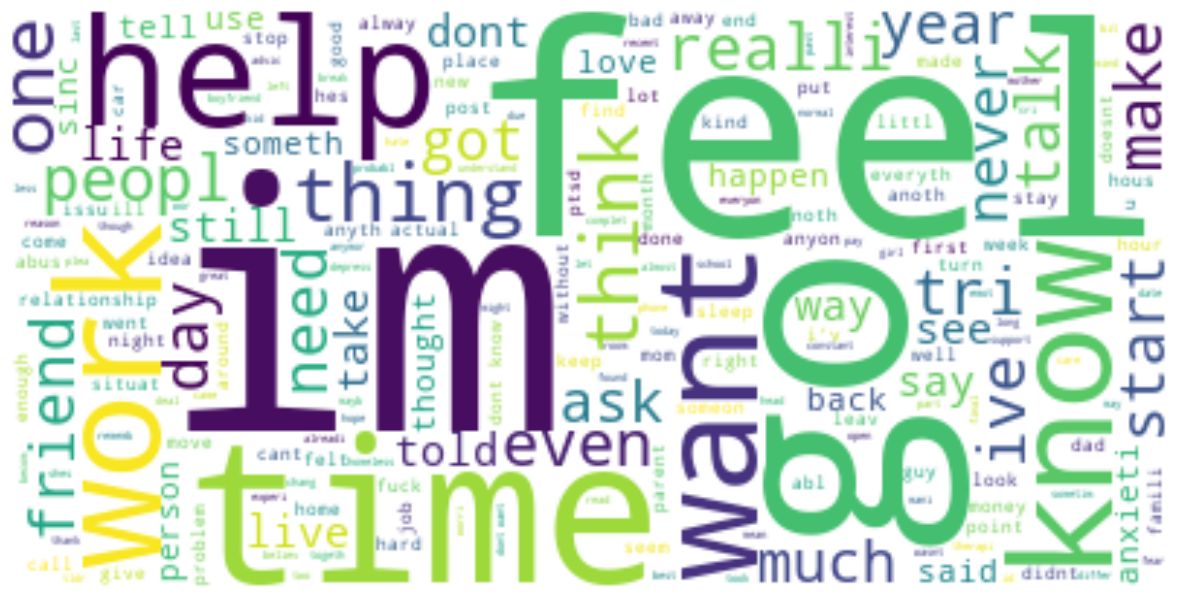

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Vectorize text data

In [9]:
cv = CountVectorizer()
X = cv.fit_transform(x)

## Split data into training and testing sets

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Train the Support Vector model

In [21]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear')

## Test the model with user input:

In [22]:
user_input = input("Enter a text: ")
user_data = cv.transform([user_input]).toarray()
prediction = model.predict(user_data)

Enter a text: I am tired


## Print the prediction:

In [23]:
def fun(prediction):
    if prediction == 1:
    
        return "Stress"
    else:
        return "No Stress"

print("Detected:", fun(prediction[0]))

Detected: No Stress
